<a href="https://colab.research.google.com/github/mmtog/Actividad-1-/blob/main/M1_Actividad_2_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
# Cargar archivo CSV de Barcelona
data = pd.read_csv("listings_Barcelona.csv.gz")
data.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,269467,https://www.airbnb.com/rooms/269467,20240615011618,2024-06-15,city scrape,Sunny and quiet Loft next to Sagrada Familia,The apartment is a cosy open space with 65 m2....,NaN,https://a0.muscache.com/pictures/a6445a90-94eb...,1411775,...,4.79,4.81,4.67,HUTB-001129,t,3,3,0,0,1.15
1,270197,https://www.airbnb.com/rooms/270197,20240615011618,2024-06-15,city scrape,*monthly stays* 4 Bedroom Apartment near Rambla,Rented only for monthly periods. 4 bedroom apa...,NaN,https://a0.muscache.com/pictures/69907440-d8df...,1414702,...,5.00,5.00,4.50,N/A SOLO ESTANCIAS MENSUALES,f,27,27,0,0,0.02
2,18674,https://www.airbnb.com/rooms/18674,20240615011618,2024-06-15,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.68,4.78,4.30,HUTB-002062,t,27,27,0,0,0.30
3,272282,https://www.airbnb.com/rooms/272282,20240615011618,2024-06-15,previous scrape,"CHARMING, VERY SPACIOUS & BEST LOCATED",Very spacious apartment located in a modernist...,Eixample is famous for being home to the major...,https://a0.muscache.com/pictures/monet/Select-...,1425070,...,4.96,4.84,4.80,HUTB003208,f,1,1,0,0,2.84
4,23197,https://www.airbnb.com/rooms/23197,20240615011618,2024-06-15,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax","Beautiful spacious apartment, large terrace, 5...","Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.99,4.62,4.64,HUTB005057,f,1,1,0,0,0.48


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18925 entries, 0 to 18924
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18925 non-null  int64  
 1   listing_url                                   18925 non-null  object 
 2   scrape_id                                     18925 non-null  int64  
 3   last_scraped                                  18925 non-null  object 
 4   source                                        18925 non-null  object 
 5   name                                          18925 non-null  object 
 6   description                                   18242 non-null  object 
 7   neighborhood_overview                         10163 non-null  object 
 8   picture_url                                   18925 non-null  object 
 9   host_id                                       18925 non-null 

In [ ]:
#Elimino las columnas de url
data1= data.drop(["name","review_scores_communication", "latitude","longitude","beds","source","host_listings_count",  "number_of_reviews_l30d", "calculated_host_listings_count_shared_rooms", "instant_bookable", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "last_scraped","bathrooms_text","neighbourhood","host_location", "scrape_id", "host_about",'listing_url','picture_url',"host_url","host_thumbnail_url","host_picture_url","description","neighborhood_overview","license","calendar_updated","has_availability","first_review","last_review"], axis=1)
data1

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,...,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value,reviews_per_month
0,269467,1411775,Jeremies,2011-11-16,within an hour,100%,88%,f,La Sagrada Família,7.0,...,2024-06-15,90,17,4.74,4.87,4.59,4.83,4.81,4.67,1.15
1,270197,1414702,Ferran,2011-11-16,within an hour,98%,97%,f,El Raval,112.0,...,2024-06-15,2,0,4.00,5.00,4.50,5.00,5.00,4.50,0.02
2,18674,71615,Mireia Maria,2010-01-19,within an hour,95%,85%,f,la Sagrada Família,45.0,...,2024-06-15,41,5,4.35,4.45,4.63,4.75,4.78,4.30,0.30
3,272282,1425070,Mar,2011-11-20,NaN,NaN,98%,t,La Nova Esquerra de l'Eixample,2.0,...,2024-06-15,414,32,4.92,4.93,4.97,4.94,4.84,4.80,2.84
4,23197,90417,Etain (Marnie),2010-03-09,within an hour,100%,87%,f,El Besòs i el Maresme,13.0,...,2024-06-15,78,7,4.79,4.93,4.89,4.95,4.62,4.64,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18920,1173891409488923931,66296022,Suzy,2016-04-08,within an hour,100%,48%,f,La Barceloneta,93.0,...,2024-06-15,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18921,1178741129427938140,346367515,Ukio,2020-05-15,within a few hours,99%,98%,f,Ibiza,714.0,...,2024-06-15,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18922,1178910876458935142,346367515,Ukio,2020-05-15,within a few hours,99%,98%,f,Ibiza,714.0,...,2024-06-15,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18923,1173984319228839137,294265812,Fer,2019-09-12,within an hour,99%,99%,f,NaN,119.0,...,2024-06-15,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Limitar numero máximo de filas
#pd.options.display.max_rows = None

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18925 entries, 0 to 18924
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18925 non-null  int64  
 1   scrape_id                                     18925 non-null  int64  
 2   last_scraped                                  18925 non-null  object 
 3   source                                        18925 non-null  object 
 4   name                                          18925 non-null  object 
 5   host_id                                       18925 non-null  int64  
 6   host_name                                     18923 non-null  object 
 7   host_since                                    18923 non-null  object 
 8   host_response_time                            16030 non-null  object 
 9   host_response_rate                            16030 non-null 

In [ ]:
#Identificar valores nulos por columna .isnull()
valores_nulos=data1.isnull().sum()
valores_nulos

,0
id,0
host_id,0
host_name,2
host_since,2
host_response_time,2895
host_response_rate,2895
host_acceptance_rate,2742
host_is_superhost,124
host_neighbourhood,9359
host_total_listings_count,2


In [ ]:
# Realizar una copia del dataframe original para no modificarlo directamente
data2 = data1.copy()

In [ ]:
# Sustituir valores nulos por "Unknown"
data2['host_response_time']=data2['host_response_time'].fillna('Unknown')
data2['host_acceptance_rate']=data2['host_acceptance_rate'].fillna('Unknown')
data2['host_is_superhost']=data2['host_is_superhost'].fillna('Unknown')
data2['host_response_rate']=data2['host_response_rate'].fillna('Unknown')
data2['host_neighbourhood']=data2['host_neighbourhood'].fillna('Unknown')
data2['bathrooms']=data2['bathrooms'].fillna('Unknown')
data2['bedrooms']=data2['bedrooms'].fillna('Unknown')

In [ ]:
# Convertir la columna 'price' a numérica (quitar símbolos de dólar y convertir a float)
data2['price'] = data2['price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
# Sustituir valores nulos en 'price' por la mediana de los precios
data2["price"]=data2["price"].fillna(round(data2["price"].median(),1))

In [ ]:
# Sustituir valores nulos en 'reviews' por 0
data2['review_scores_rating']=data2['review_scores_rating'].fillna(0)
data2['reviews_per_month']=data2['reviews_per_month'].fillna(0)
data2['review_scores_value']=data2['review_scores_rating'].fillna(0)
data2['review_scores_accuracy']=data2['review_scores_accuracy'].fillna(0)
data2['review_scores_cleanliness']=data2['review_scores_cleanliness'].fillna(0)
data2['review_scores_location']=data2['review_scores_location'].fillna(0)
data2['review_scores_checkin']=data2['review_scores_checkin'].fillna(0)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18925 entries, 0 to 18924
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            18925 non-null  int64  
 1   host_id                       18925 non-null  int64  
 2   host_name                     18923 non-null  object 
 3   host_since                    18923 non-null  object 
 4   host_response_time            18925 non-null  object 
 5   host_response_rate            18925 non-null  object 
 6   host_acceptance_rate          18925 non-null  object 
 7   host_is_superhost             18925 non-null  object 
 8   host_neighbourhood            18925 non-null  object 
 9   host_total_listings_count     18923 non-null  float64
 10  host_verifications            18923 non-null  object 
 11  host_has_profile_pic          18923 non-null  object 
 12  host_identity_verified        18923 non-null  object 
 13  n

In [ ]:
#Elimina todas filas donde no hay dato
data3 = data2.dropna()

In [ ]:
# Corroborar que ya no hay valores nulos en el dataframe
valores_nulos=data3.isnull().sum()
valores_nulos

,0
id,0
host_id,0
host_name,0
host_since,0
host_response_time,0
host_response_rate,0
host_acceptance_rate,0
host_is_superhost,0
host_neighbourhood,0
host_total_listings_count,0


OUTLIERS

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18923 entries, 0 to 18924
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            18923 non-null  int64  
 1   host_id                       18923 non-null  int64  
 2   host_name                     18923 non-null  object 
 3   host_since                    18923 non-null  object 
 4   host_response_time            18923 non-null  object 
 5   host_response_rate            18923 non-null  object 
 6   host_acceptance_rate          18923 non-null  object 
 7   host_is_superhost             18923 non-null  object 
 8   host_neighbourhood            18923 non-null  object 
 9   host_total_listings_count     18923 non-null  float64
 10  host_verifications            18923 non-null  object 
 11  host_has_profile_pic          18923 non-null  object 
 12  host_identity_verified        18923 non-null  object 
 13  neighb

In [ ]:
Cualitativas=data3.iloc[:,[2,3,4,5,6,7,8,10,11,12,13,14,15,16,18,19,20,34]]
Cuantitativas=data3.iloc[:,[0,1,9,17,21,22,23,24,25,26,27,28,29,30,31,32,33,35,36,37,38,39,40,41,42,43]]

<Figure size 2000x800 with 0 Axes>

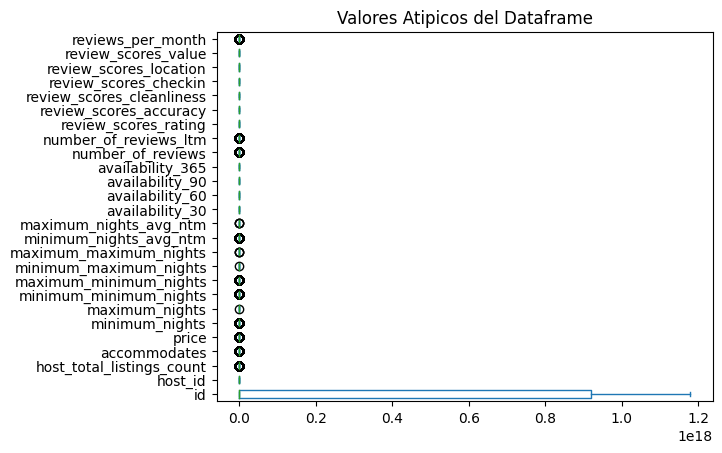

In [ ]:
#Identificación y tratamiento de valores atípicos (outliers)

#Realizamos diagrama de caja y bigote de cada columna del dataframe
fig=plt.figure(figsize=(20,8))
Cuantitativas.plot(kind="box",vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
#Metodo aplicando cuartiles encuentro cuartiles 0.25 y 0.75
y=Cuantitativas

percentile25=y.quantile(0.25) #q1
percentile75=y.quantile(0.75) #q3
iqr=percentile75-percentile25

Limite_Superior= percentile75+1.5*iqr
Limite_Inferior=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)


Limite superior permitido id                           2.300599e+18
host_id                      8.500978e+08
host_total_listings_count    1.305000e+02
accommodates                 7.000000e+00
price                        4.145000e+02
minimum_nights               7.600000e+01
maximum_nights               2.340000e+03
minimum_minimum_nights       7.600000e+01
maximum_minimum_nights       7.300000e+01
minimum_maximum_nights       2.539500e+03
maximum_maximum_nights       2.313000e+03
minimum_nights_avg_ntm       7.450000e+01
maximum_nights_avg_ntm       2.317500e+03
availability_30              3.250000e+01
availability_60              9.100000e+01
availability_90              1.475000e+02
availability_365             5.975000e+02
number_of_reviews            1.200000e+02
number_of_reviews_ltm        3.750000e+01
review_scores_rating         1.207500e+01
review_scores_accuracy       1.220000e+01
review_scores_cleanliness    1.215000e+01
review_scores_checkin        1.237500e+01
review_s

In [ ]:
#Obtenemos datos y los outliners se convierten en nulos en el dataframe
Cuantitativas1=Cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Cuantitativas1

,id,host_id,host_total_listings_count,accommodates,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value,reviews_per_month
0,269467,1411775,7.0,2.0,176.0,7.0,760.0,7.0,7.0,760.0,...,257,90.0,17.0,4.74,4.87,4.59,4.83,4.81,4.74,1.15
1,270197,1414702,112.0,6.0,74.0,32.0,760.0,32.0,32.0,760.0,...,0,2.0,0.0,4.00,5.00,4.50,5.00,5.00,4.00,0.02
2,18674,71615,45.0,NaN,257.0,1.0,1125.0,1.0,4.0,1125.0,...,177,41.0,5.0,4.35,4.45,4.63,4.75,4.78,4.35,0.30
3,272282,1425070,2.0,NaN,136.0,4.0,1125.0,3.0,3.0,1125.0,...,0,NaN,32.0,4.92,4.93,4.97,4.94,4.84,4.92,2.84
4,23197,90417,13.0,5.0,249.0,3.0,32.0,1.0,7.0,1125.0,...,178,78.0,7.0,4.79,4.93,4.89,4.95,4.62,4.79,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18920,1173891409488923931,66296022,93.0,2.0,86.0,32.0,345.0,32.0,32.0,345.0,...,268,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18921,1178741129427938140,346367515,NaN,4.0,167.0,31.0,330.0,31.0,31.0,330.0,...,324,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18922,1178910876458935142,346367515,NaN,4.0,165.0,31.0,330.0,31.0,31.0,330.0,...,294,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18923,1173984319228839137,294265812,119.0,2.0,44.0,5.0,90.0,5.0,5.0,90.0,...,9,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Identificar valores nulos por columna después de eliminar outliers
valores_nulos_outliers = Cuantitativas1.isnull().sum()
valores_nulos_outliers

,0
id,0
host_id,0
host_total_listings_count,2989
accommodates,883
price,1176
minimum_nights,190
maximum_nights,1
minimum_minimum_nights,174
maximum_minimum_nights,519
minimum_maximum_nights,1


In [ ]:
#Reemplazamos valores atípicos (nulos) del df con "mean"
#Realizamos copia del df
Cuantitativas_limpio=Cuantitativas1.copy()
Cuantitativas_limpio=Cuantitativas_limpio.fillna(round(Cuantitativas1.mean(),1))
Cuantitativas_limpio

,id,host_id,host_total_listings_count,accommodates,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value,reviews_per_month
0,269467,1411775,7.0,2.0,176.0,7.0,760.0,7.0,7.0,760.0,...,257,90.0,17.0,4.74,4.87,4.59,4.83,4.81,4.74,1.15
1,270197,1414702,112.0,6.0,74.0,32.0,760.0,32.0,32.0,760.0,...,0,2.0,0.0,4.00,5.00,4.50,5.00,5.00,4.00,0.02
2,18674,71615,45.0,3.0,257.0,1.0,1125.0,1.0,4.0,1125.0,...,177,41.0,5.0,4.35,4.45,4.63,4.75,4.78,4.35,0.30
3,272282,1425070,2.0,3.0,136.0,4.0,1125.0,3.0,3.0,1125.0,...,0,18.1,32.0,4.92,4.93,4.97,4.94,4.84,4.92,2.84
4,23197,90417,13.0,5.0,249.0,3.0,32.0,1.0,7.0,1125.0,...,178,78.0,7.0,4.79,4.93,4.89,4.95,4.62,4.79,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18920,1173891409488923931,66296022,93.0,2.0,86.0,32.0,345.0,32.0,32.0,345.0,...,268,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18921,1178741129427938140,346367515,18.6,4.0,167.0,31.0,330.0,31.0,31.0,330.0,...,324,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18922,1178910876458935142,346367515,18.6,4.0,165.0,31.0,330.0,31.0,31.0,330.0,...,294,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18923,1173984319228839137,294265812,119.0,2.0,44.0,5.0,90.0,5.0,5.0,90.0,...,9,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Corroborar valores nulos finales después del tratamiento de outliers
valores_nulos_final = Cuantitativas_limpio.isnull().sum()
valores_nulos_final

,0
id,0
host_id,0
host_total_listings_count,0
accommodates,0
price,0
minimum_nights,0
maximum_nights,0
minimum_minimum_nights,0
maximum_minimum_nights,0
minimum_maximum_nights,0


In [ ]:
# Corroborar valores nulos finales después del tratamiento de outliers
valores_nulos_final = Cualitativas.isnull().sum()
valores_nulos_final

,0
host_name,0
host_since,0
host_response_time,0
host_response_rate,0
host_acceptance_rate,0
host_is_superhost,0
host_neighbourhood,0
host_verifications,0
host_has_profile_pic,0
host_identity_verified,0


In [ ]:
Valores_limpios=pd.concat([Cuantitativas_limpio,Cualitativas],axis=1)
Valores_limpios

,id,host_id,host_total_listings_count,accommodates,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms,bedrooms,amenities,calendar_last_scraped
0,269467,1411775,7.0,2.0,176.0,7.0,760.0,7.0,7.0,760.0,...,t,t,la Sagrada Família,Eixample,Entire loft,Entire home/apt,1.0,1.0,"[""Kitchen"", ""Patio or balcony"", ""Host greets y...",2024-06-15
1,270197,1414702,112.0,6.0,74.0,32.0,760.0,32.0,32.0,760.0,...,t,t,el Raval,Ciutat Vella,Entire rental unit,Entire home/apt,1.5,4.0,"[""Kitchen"", ""Washer"", ""Smoking allowed"", ""Wifi...",2024-06-15
2,18674,71615,45.0,3.0,257.0,1.0,1125.0,1.0,4.0,1125.0,...,t,t,la Sagrada Família,Eixample,Entire rental unit,Entire home/apt,2.0,3.0,"[""Pack \u2019n play/Travel crib"", ""Free street...",2024-06-15
3,272282,1425070,2.0,3.0,136.0,4.0,1125.0,3.0,3.0,1125.0,...,t,t,l'Antiga Esquerra de l'Eixample,Eixample,Entire rental unit,Entire home/apt,Unknown,3.0,"[""Pack \u2019n play/Travel crib"", ""Kitchen"", ""...",2024-06-15
4,23197,90417,13.0,5.0,249.0,3.0,32.0,1.0,7.0,1125.0,...,t,t,el Besòs i el Maresme,Sant Martí,Entire rental unit,Entire home/apt,2.0,3.0,"[""Free street parking"", ""Neutral body soap"", ""...",2024-06-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18920,1173891409488923931,66296022,93.0,2.0,86.0,32.0,345.0,32.0,32.0,345.0,...,t,t,la Barceloneta,Ciutat Vella,Entire rental unit,Entire home/apt,1.0,1.0,"[""Kitchen"", ""Washer"", ""Wifi"", ""Air conditionin...",2024-06-15
18921,1178741129427938140,346367515,18.6,4.0,167.0,31.0,330.0,31.0,31.0,330.0,...,t,t,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,Entire rental unit,Entire home/apt,2.0,2.0,"[""Cleaning products"", ""Kitchen"", ""Dryer"", ""Fir...",2024-06-15
18922,1178910876458935142,346367515,18.6,4.0,165.0,31.0,330.0,31.0,31.0,330.0,...,t,t,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,Entire rental unit,Entire home/apt,2.0,2.0,"[""Cleaning products"", ""Kitchen"", ""Dryer"", ""Fir...",2024-06-15
18923,1173984319228839137,294265812,119.0,2.0,44.0,5.0,90.0,5.0,5.0,90.0,...,t,t,el Barri Gòtic,Ciutat Vella,Private room in rental unit,Private room,1.0,1.0,"[""Wifi"", ""Lock on bedroom door""]",2024-06-15


In [ ]:
#Valores_limpios.to_csv("Barcelona_limpios_final.csv")

In [ ]:
# Corroborar valores nulos finales después del tratamiento de outliers
valores_nulos_final = Valores_limpios.isnull().sum()
valores_nulos_final

,0
id,0
host_id,0
host_total_listings_count,0
accommodates,0
price,0
minimum_nights,0
maximum_nights,0
minimum_minimum_nights,0
maximum_minimum_nights,0
minimum_maximum_nights,0


In [ ]:
# Reemplazar 'unknown' por NaN
Valores_limpios['host_response_rate'] = Valores_limpios['host_response_rate'].replace('Unknown', np.nan)

# Eliminar el símbolo '%' y convertir a float
Valores_limpios['host_response_rate'] = Valores_limpios['host_response_rate'].str.replace('%', '').astype(float)

# Rellenar NaN con la media
Valores_limpios['host_response_rate'].fillna(Valores_limpios['host_response_rate'].median(), inplace=True)

In [ ]:
# Reemplazar 'unknown' por NaN
Valores_limpios['host_acceptance_rate'] = Valores_limpios['host_acceptance_rate'].replace('Unknown', np.nan)

# Eliminar el símbolo '%' y convertir a float
Valores_limpios['host_acceptance_rate'] = Valores_limpios['host_acceptance_rate'].str.replace('%', '').astype(float)

# Rellenar NaN con la media
Valores_limpios['host_acceptance_rate'].fillna(Valores_limpios['host_acceptance_rate'].median(), inplace=True)